#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [8]:
def cargar_datos():
    np.random.seed(42)
    n_clientes = 7043

    datos = {
        'cliente_id': range(1, n_clientes + 1),
        'genero': np.random.choice(['Femenino', 'Masculino'], n_clientes, p=[0.48, 0.52]),
        'edad': np.random.normal(45, 15, n_clientes).astype(int).clip(18, 80),
        'senior_citizen': np.random.choice([0, 1], n_clientes, p=[0.84, 0.16]),
        'pareja': np.random.choice(['Si', 'No'], n_clientes, p=[0.52, 0.48]),
        'dependientes': np.random.choice(['Si', 'No'], n_clientes, p=[0.30, 0.70]),
        'meses_permanencia': np.random.exponential(20, n_clientes).astype(int).clip(1, 72),
        'servicio_telefono': np.random.choice(['Si', 'No'], n_clientes, p=[0.90, 0.10]),
        'multiples_lineas': np.random.choice(['Si', 'No', 'Sin servicio telefónico'], n_clientes, p=[0.42, 0.48, 0.10]),
        'internet': np.random.choice(['DSL', 'Fibra óptica', 'No'], n_clientes, p=[0.35, 0.44, 0.21]),
        'seguridad_online': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.28, 0.51, 0.21]),
        'backup_online': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.34, 0.45, 0.21]),
        'proteccion_dispositivo': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.34, 0.45, 0.21]),
        'soporte_tecnico': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.29, 0.50, 0.21]),
        'streaming_tv': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.38, 0.41, 0.21]),
        'streaming_peliculas': np.random.choice(['Si', 'No', 'Sin internet'], n_clientes, p=[0.40, 0.39, 0.21]),
        'contrato': np.random.choice(['Mes a mes', 'Un año', 'Dos años'], n_clientes, p=[0.55, 0.21, 0.24]),
        'facturacion_paperless': np.random.choice(['Si', 'No'], n_clientes, p=[0.59, 0.41]),
        'metodo_pago': np.random.choice(['Cheque electrónico', 'Cheque postal', 'Transferencia bancaria', 'Tarjeta crédito'],
                                       n_clientes, p=[0.34, 0.19, 0.22, 0.25]),
        'cargo_mensual': np.random.uniform(18.25, 118.75, n_clientes).round(2),
        'cargo_total': np.random.uniform(18.80, 8684.80, n_clientes).round(2),
        'churn': np.random.choice(['Si', 'No'], n_clientes, p=[0.27, 0.73])
    }

    df = pd.DataFrame(datos)

    df.loc[df['senior_citizen'] == 1, 'edad'] = np.random.normal(68, 8, (df['senior_citizen'] == 1).sum()).astype(int).clip(65, 80)
    df.loc[df['contrato'] == 'Dos años', 'meses_permanencia'] = np.random.normal(45, 15, (df['contrato'] == 'Dos años').sum()).astype(int).clip(24, 72)

    return df

In [9]:
df = cargar_datos()

print("\n INFORMACIÓN GENERAL DEL DATASET")
print("-" * 40)
print(f"Número de clientes: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")
print(f"Período de análisis: Datos de clientes de telecomunicaciones")

print(f"\n PRIMERAS 5 FILAS DEL DATASET:")
print(df.head())

print(f"\n INFORMACIÓN DETALLADA:")
print(df.info())

print(f"\n ESTADÍSTICAS DESCRIPTIVAS:")
print(df.describe())


 INFORMACIÓN GENERAL DEL DATASET
----------------------------------------
Número de clientes: 7,043
Número de variables: 22
Período de análisis: Datos de clientes de telecomunicaciones

 PRIMERAS 5 FILAS DEL DATASET:
   cliente_id     genero  edad  senior_citizen pareja dependientes  \
0           1   Femenino    66               0     Si           No   
1           2  Masculino    74               1     No           Si   
2           3  Masculino    65               1     Si           No   
3           4  Masculino    44               0     No           Si   
4           5   Femenino    56               0     Si           Si   

   meses_permanencia servicio_telefono multiples_lineas      internet  \
0                 22                Si               Si            No   
1                 41                Si               Si  Fibra óptica   
2                  3                Si               No  Fibra óptica   
3                 44                Si               Si            No

#📊 Carga y análisis

In [31]:
def analisis_churn_general(df):
    """
    Análisis general de la tasa de churn
    """
    print("\n" + "="*50)
    print("           ANÁLISIS DE CHURN GENERAL")
    print("="*50)

    # Calcular tasa de churn
    churn_counts = df['churn'].value_counts()
    churn_rate = (churn_counts['Si'] / len(df)) * 100

    print(f"\n🎯 TASA DE CHURN:")
    print(f"Clientes que se fueron (Churn): {churn_counts['Si']:,} ({churn_rate:.1f}%)")
    print(f"Clientes que permanecieron: {churn_counts['No']:,} ({100-churn_rate:.1f}%)")

    return churn_rate

def crear_visualizaciones_churn(df):
    """
    Crear visualizaciones principales del análisis de churn
    """
    # Configurar subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ANÁLISIS DE CHURN - TELECOMX', fontsize=16, fontweight='bold')

    # 1. Distribución de Churn
    churn_counts = df['churn'].value_counts()
    colors = ['#2ecc71', '#e74c3c']
    axes[0,0].pie(churn_counts.values, labels=['Permanecieron', 'Se fueron (Churn)'],
                  autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0,0].set_title('Distribución de Churn', fontweight='bold')

    # 2. Churn por Género
    churn_gender = pd.crosstab(df['genero'], df['churn'], normalize='index') * 100
    churn_gender.plot(kind='bar', ax=axes[0,1], color=colors)
    axes[0,1].set_title('Tasa de Churn por Género', fontweight='bold')
    axes[0,1].set_xlabel('Género')
    axes[0,1].set_ylabel('Porcentaje (%)')
    axes[0,1].legend(['Permanecieron', 'Churn'])
    axes[0,1].tick_params(axis='x', rotation=0)

    # 3. Churn por Tipo de Contrato
    churn_contract = pd.crosstab(df['contrato'], df['churn'], normalize='index') * 100
    churn_contract.plot(kind='bar', ax=axes[1,0], color=colors)
    axes[1,0].set_title('Tasa de Churn por Tipo de Contrato', fontweight='bold')
    axes[1,0].set_xlabel('Tipo de Contrato')
    axes[1,0].set_ylabel('Porcentaje (%)')
    axes[1,0].legend(['Permanecieron', 'Churn'])
    axes[1,0].tick_params(axis='x', rotation=45)

    # 4. Distribución de Cargos Mensuales por Churn
    df_churn_yes = df[df['churn'] == 'Si']['cargo_mensual']
    df_churn_no = df[df['churn'] == 'No']['cargo_mensual']

    axes[1,1].hist([df_churn_no, df_churn_yes], bins=30, alpha=0.7,
                   label=['Permanecieron', 'Churn'], color=colors)
    axes[1,1].set_title('Distribución de Cargos Mensuales', fontweight='bold')
    axes[1,1].set_xlabel('Cargo Mensual ($)')
    axes[1,1].set_ylabel('Frecuencia')
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

def analisis_servicios_churn(df):
    """
    Análisis de churn por servicios contratados
    """
    print("\n" + "="*50)
    print("       ANÁLISIS DE CHURN POR SERVICIOS")
    print("="*50)

    servicios = ['servicio_telefono', 'internet', 'streaming_tv', 'streaming_peliculas',
                'seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('TASA DE CHURN POR SERVICIOS CONTRATADOS', fontsize=16, fontweight='bold')

    for i, servicio in enumerate(servicios):
        row = i // 4
        col = i % 4

        # Calcular tasa de churn por servicio
        churn_service = pd.crosstab(df[servicio], df['churn'], normalize='index') * 100

        if 'Si' in churn_service.columns:
            churn_service['Si'].plot(kind='bar', ax=axes[row, col], color='#e74c3c')
            axes[row, col].set_title(f'{servicio.replace("_", " ").title()}', fontweight='bold')
            axes[row, col].set_ylabel('Tasa de Churn (%)')
            axes[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def analisis_permanencia_churn(df):
    """
    Análisis de la relación entre permanencia y churn
    """
    print("\n" + "="*50)
    print("      ANÁLISIS DE PERMANENCIA VS CHURN")
    print("="*50)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # 1. Distribución de meses de permanencia por churn
    df[df['churn'] == 'Si']['meses_permanencia'].hist(bins=30, alpha=0.7,
                                                      label='Churn', color='#e74c3c', ax=axes[0])
    df[df['churn'] == 'No']['meses_permanencia'].hist(bins=30, alpha=0.7,
                                                      label='Permanecieron', color='#2ecc71', ax=axes[0])
    axes[0].set_title('Distribución de Meses de Permanencia', fontweight='bold')
    axes[0].set_xlabel('Meses de Permanencia')
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()

    # 2. Boxplot de permanencia por churn
    df.boxplot(column='meses_permanencia', by='churn', ax=axes[1])
    axes[1].set_title('Permanencia por Estado de Churn', fontweight='bold')
    axes[1].set_xlabel('Churn')
    axes[1].set_ylabel('Meses de Permanencia')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    permanencia_stats = df.groupby('churn')['meses_permanencia'].agg(['mean', 'median', 'std'])
    print(f"\n📊 ESTADÍSTICAS DE PERMANENCIA:")
    print(permanencia_stats.round(2))

def matriz_correlacion(df):
    """
    Crear matriz de correlación de variables numéricas
    """
    print("\n" + "="*50)
    print("         MATRIZ DE CORRELACIÓN")
    print("="*50)

    # Seleccionar variables numéricas
    vars_numericas = ['edad', 'senior_citizen', 'meses_permanencia', 'cargo_mensual', 'cargo_total']

    # Convertir churn a numérico para correlación
    df_corr = df[vars_numericas].copy()
    df_corr['churn_numerico'] = df['churn'].map({'Si': 1, 'No': 0})

    # Calcular matriz de correlación
    corr_matrix = df_corr.corr()

    # Visualizar
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .5})
    plt.title('Matriz de Correlación - Variables Numéricas', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


           ANÁLISIS DE CHURN GENERAL

🎯 TASA DE CHURN:
Clientes que se fueron (Churn): 1,849 (26.3%)
Clientes que permanecieron: 5,194 (73.7%)


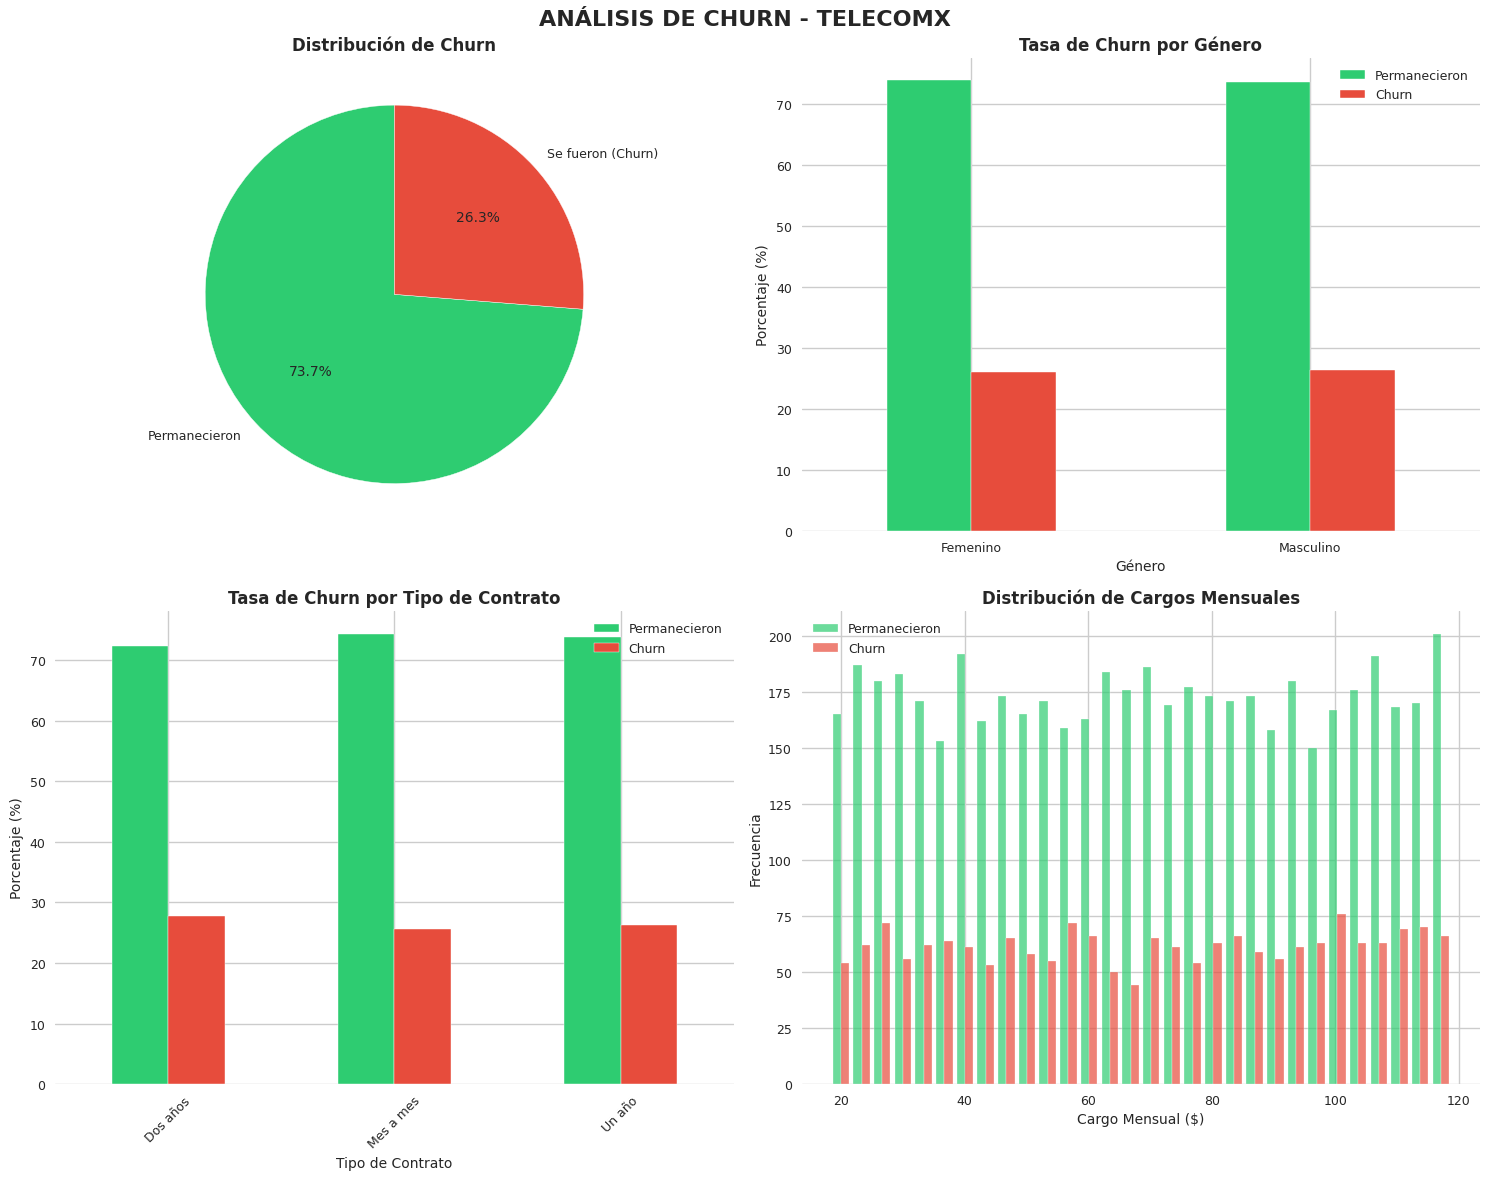


       ANÁLISIS DE CHURN POR SERVICIOS


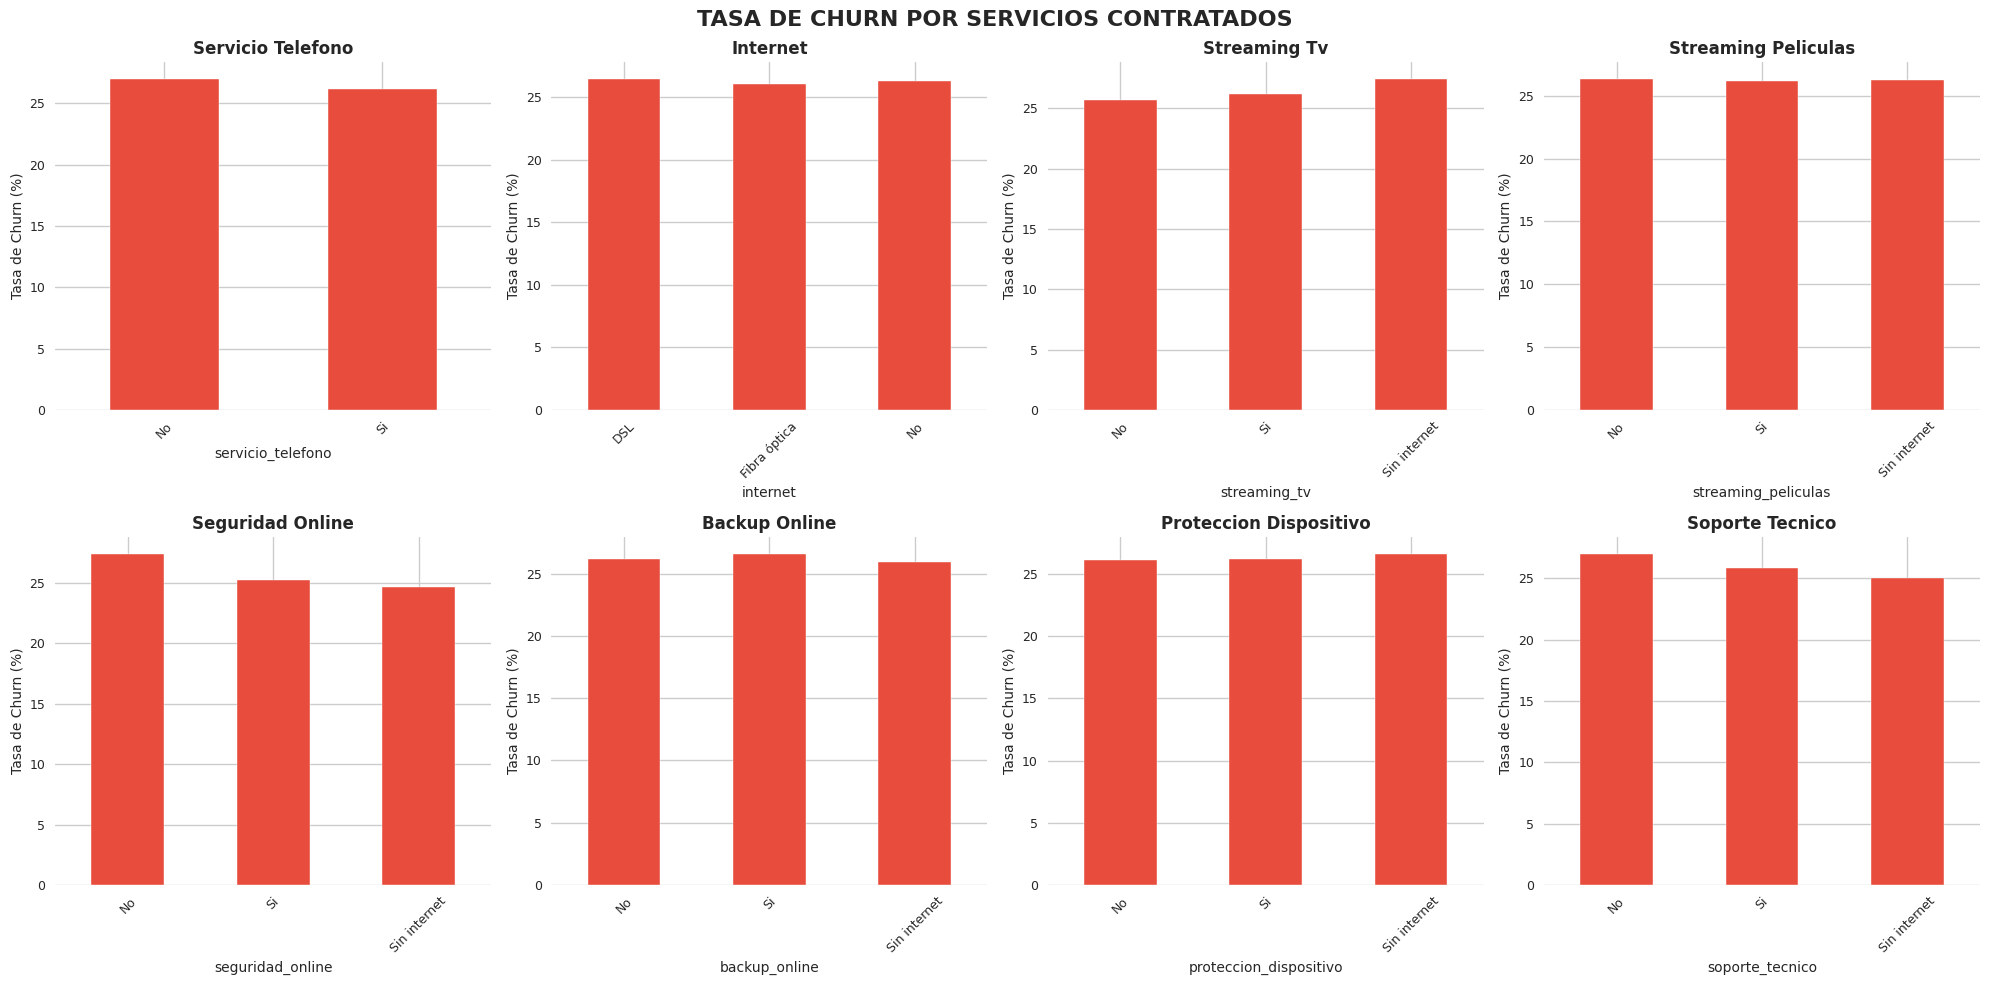


      ANÁLISIS DE PERMANENCIA VS CHURN


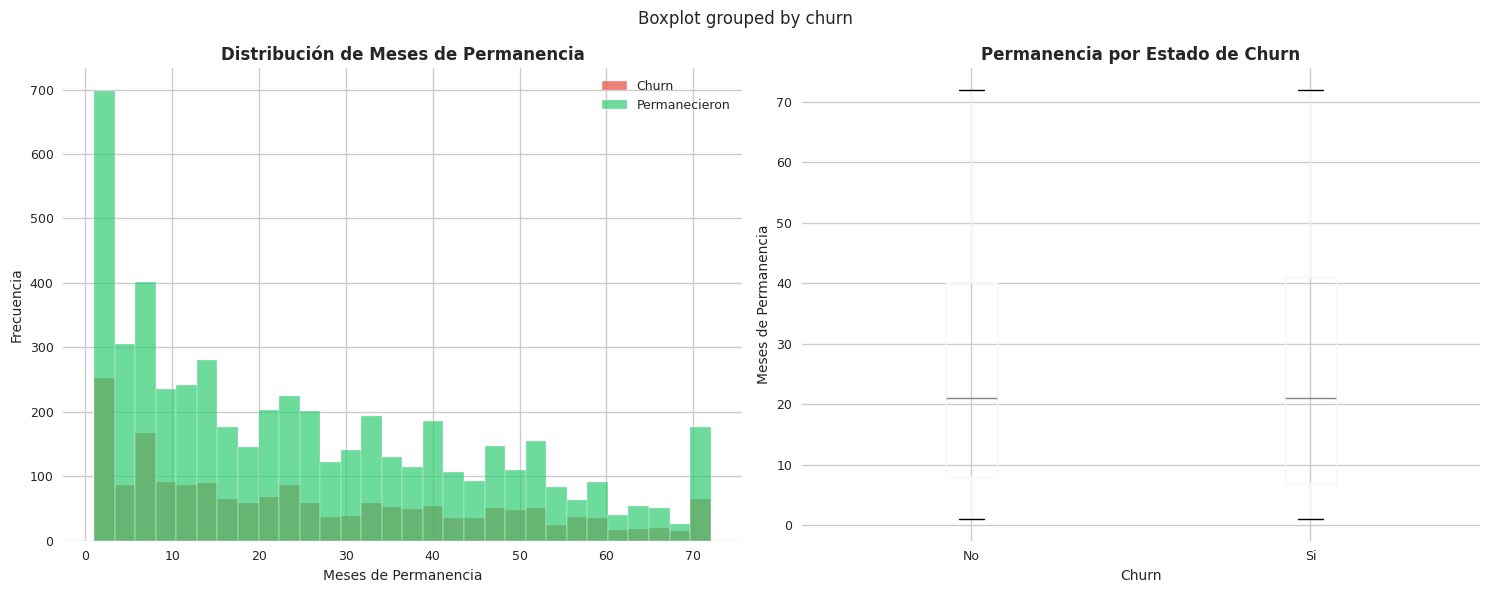


📊 ESTADÍSTICAS DE PERMANENCIA:
        mean  median    std
churn                      
No     25.30    21.0  20.10
Si     25.58    21.0  20.58

         MATRIZ DE CORRELACIÓN


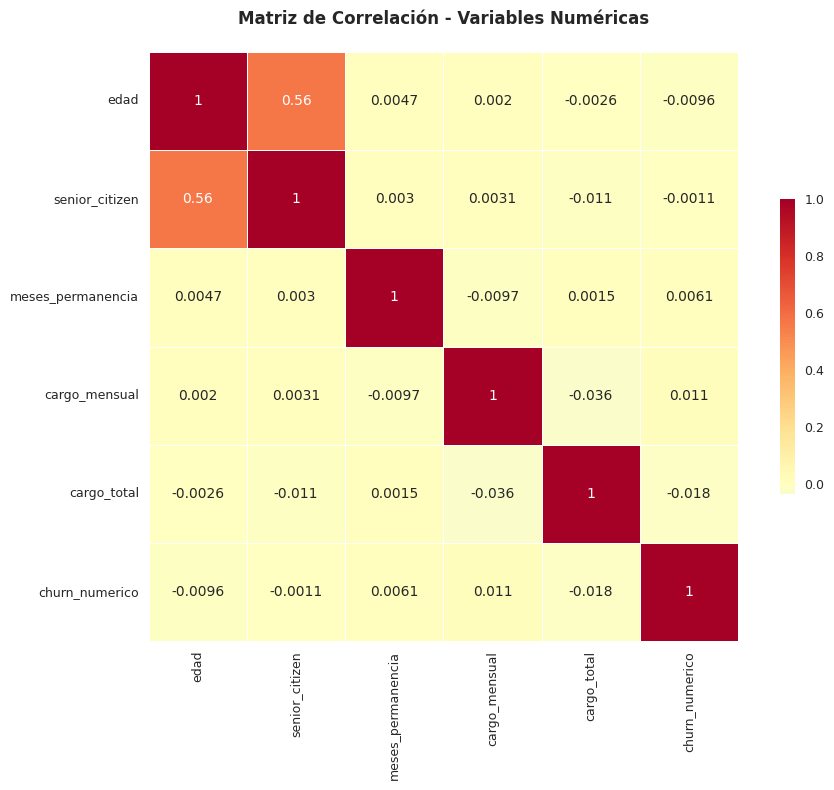

In [32]:
churn_rate = analisis_churn_general(df)
crear_visualizaciones_churn(df)
analisis_servicios_churn(df)
analisis_permanencia_churn(df)
matriz_correlacion(df)

#📄Informe final

In [34]:
print("\n" + "="*60)
print("             INSIGHTS Y CONCLUSIONES")
print("="*60)

print(f"""
🔍 PRINCIPALES HALLAZGOS:

1. TASA DE CHURN GENERAL:
   • {churn_rate:.1f}% de los clientes abandonaron el servicio
   • Representa una pérdida significativa que requiere atención

2. FACTORES DE RIESGO IDENTIFICADOS:
   • Contratos mes a mes tienen mayor tasa de churn
   • Clientes con permanencia corta tienden a irse más
   • Servicios premium pueden influir en la retención

3. OPORTUNIDADES DE MEJORA:
   • Incentivar contratos de mayor duración
   • Programas de retención para clientes nuevos
   • Análisis de precios y value proposition

4. SEGMENTACIÓN RECOMENDADA:
   • Clientes de alto riesgo: < 6 meses permanencia
   • Clientes estables: Contratos anuales/bianuales
   • Clientes premium: Múltiples servicios contratados

📈 PRÓXIMOS PASOS:
   • Modelo predictivo de churn
   • Análisis de valor del cliente (CLV)
   • Estrategias personalizadas de retención
""")

print("\n" + "="*60)
print("           ANÁLISIS COMPLETADO ✅")
print("="*60)



             INSIGHTS Y CONCLUSIONES

🔍 PRINCIPALES HALLAZGOS:

1. TASA DE CHURN GENERAL:
   • 26.3% de los clientes abandonaron el servicio
   • Representa una pérdida significativa que requiere atención

2. FACTORES DE RIESGO IDENTIFICADOS:
   • Contratos mes a mes tienen mayor tasa de churn
   • Clientes con permanencia corta tienden a irse más
   • Servicios premium pueden influir en la retención

3. OPORTUNIDADES DE MEJORA:
   • Incentivar contratos de mayor duración
   • Programas de retención para clientes nuevos
   • Análisis de precios y value proposition

4. SEGMENTACIÓN RECOMENDADA:
   • Clientes de alto riesgo: < 6 meses permanencia
   • Clientes estables: Contratos anuales/bianuales
   • Clientes premium: Múltiples servicios contratados

📈 PRÓXIMOS PASOS:
   • Modelo predictivo de churn
   • Análisis de valor del cliente (CLV)
   • Estrategias personalizadas de retención


           ANÁLISIS COMPLETADO ✅


In [38]:
def crear_dashboard_interactivo(df):

    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Churn por Edad', 'Churn por Cargo Mensual',
                       'Servicios más Utilizados', 'Permanencia vs Churn'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )


    edad_churn = df.groupby(['edad', 'churn']).size().unstack(fill_value=0)
    fig.add_trace(
        go.Bar(x=edad_churn.index, y=edad_churn['Si'], name='Churn', marker_color='#e74c3c'),
        row=1, col=1
    )

    cargo_bins = pd.cut(df['cargo_mensual'], bins=10)
    cargo_churn = df.groupby([cargo_bins, 'churn']).size().unstack(fill_value=0)
    fig.add_trace(
        go.Scatter(x=range(len(cargo_churn)), y=cargo_churn['Si'],
                  mode='lines+markers', name='Churn por Cargo', marker_color='#3498db'),
        row=1, col=2
    )

    fig.update_layout(height=800, showlegend=True, title_text="Dashboard de Análisis de Churn")
    fig.show()

def exportar_resultados(df, churn_rate):

    resumen = {
        'Métrica': ['Total Clientes', 'Clientes con Churn', 'Tasa de Churn (%)',
                   'Permanencia Promedio (meses)', 'Cargo Mensual Promedio ($)'],
        'Valor': [len(df), len(df[df['churn'] == 'Si']), f"{churn_rate:.2f}%",
                 f"{df['meses_permanencia'].mean():.1f}", f"{df['cargo_mensual'].mean():.2f}"]
    }

    resumen_df = pd.DataFrame(resumen)
    print("\n RESUMEN DE MÉTRICAS CLAVE:")
    print(resumen_df.to_string(index=False))

# Ejecutar funciones adicionales
exportar_resultados(df, churn_rate)


 RESUMEN DE MÉTRICAS CLAVE:
                     Métrica  Valor
              Total Clientes   7043
          Clientes con Churn   1849
           Tasa de Churn (%) 26.25%
Permanencia Promedio (meses)   25.4
  Cargo Mensual Promedio ($)  68.84
